##### 容器資料型態 collections
Python 的標準函式「 collections」是一個可以創建特別「容器資料型態」的函式庫，所創建的容器可以用來替代 Python 一般內建的容器，\
例如 dict、list、set 和 tuple，熟練應用後不僅能提升程式碼的可讀性，更能提高程式執行的效率。

##### collections 的方法 
下方列出 collections 模組常用的幾個方法 ( 參考 Python 官方文件：[collections](https://docs.python.org/zh-tw/3/library/collections.html) )：

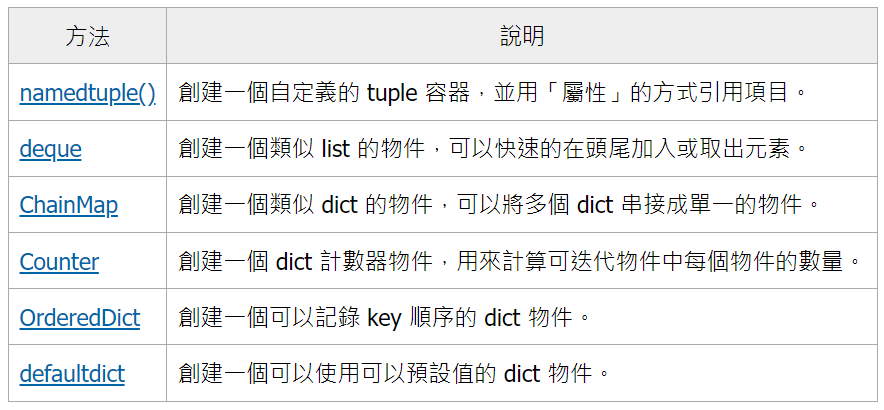

##### import collections 
要使用 collections 必須先 import collections 模組，或使用 from 的方式，單獨 import 特定的類型。

In [ ]:
import collections
from collections import namedtuple

##### namedtuple() 
namedtuple() 可以創建一個自定義的 tuple 容器，並用「屬性」的方式引用 tuple 的某個項目，不僅具備 tuple 的不可變性，\
又具有引用屬性的彈性。

下方的例子使用 namedtuple 定義了一個 circle 對象，包含 x、y 和 r ( 中心點 xy 座標和半徑 r ) 三個屬性，\
使用時就可以像字典用法一般，讀取指定的屬性。

In [ ]:
from collections import namedtuple

circle = namedtuple('Point', ['x', 'y', 'r'])
c = circle(10,20,50)

print(c)                 # Point(x=10, y=20, r=50)
print(c.x, c.y, c.r)     # 10 20 50
print(c[0], c[1], c[2])  # 10 20 50

##### deque 
雖然 Python 的 list 已經具有插入和刪除元素的功能，但如果要處理「大量的」項目，就會產生效能不足的狀況，\
然而使用 collections 將項目轉換為類似 list 的 deque 物件，就能以高效率的方式處理 list 資料，\
當資料變成 deque 物件後，可使用下列的方法操作：

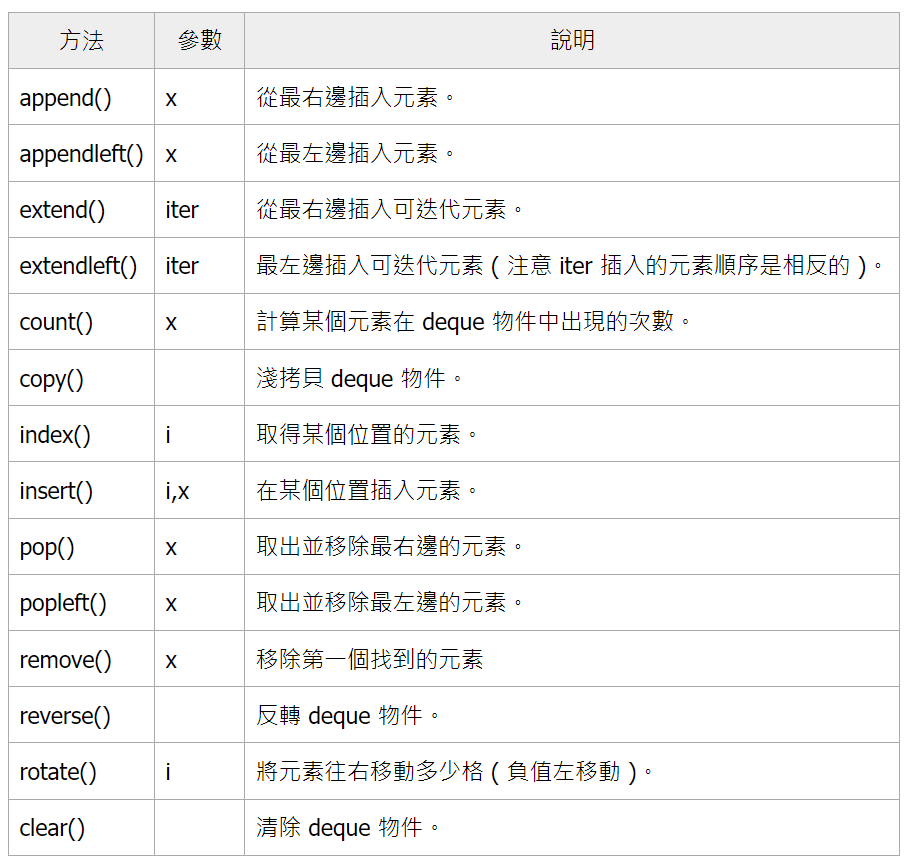

In [ ]:
from collections import deque

a = deque(['a','b','c','d','e'])   # 建立 deque 物件

a.append('x')
a.append('y')        # 在最右邊加入元素
print(a)             # deque(['a', 'b', 'c', 'd', 'e', 'x', 'y'])

a.appendleft('x')
a.appendleft('y')    # 在最左邊加入元素
print(a)             # deque(['y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y'])

b = a.copy()         # 淺拷貝
print(b)             # deque(['y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y'])

print(a.count('x'))  # 2，計算 x 出現的次數

a.extend(['m','n'])  # 在最右邊加入 ['m','n']
print(a)             # deque(['y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm', 'n'])

a.extendleft(['m','n'])  # 在最左邊加入 ['m','n']
print(a)                 # deque(['n', 'm', 'y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm', 'n'])

print(a[5])      # b，取出第六個元素 ( 第一個為 0 )

a.insert(1,'k')  # 在第二個位置插入 k
print(a)         # deque(['n', 'k', 'm', 'y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm', 'n'])

a.pop()          # 移除最右邊的元素
print(a)         # deque(['n', 'k', 'm', 'y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm'])

a.popleft()      # 移除最左邊的元素
print(a)         # deque(['k', 'm', 'y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm'])

a.remove('x')    # 移除第一個 x
print(a)         # deque(['k', 'm', 'y', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm'])

a.reverse()      # 反轉
print(a)         # deque(['m', 'y', 'x', 'e', 'd', 'c', 'b', 'a', 'y', 'm', 'k'])

a.rotate(5)      # 往右邊移動五格
print(a)         # deque(['b', 'a', 'y', 'm', 'k', 'm', 'y', 'x', 'e', 'd', 'c'])

a.clear()        # 清空項目
print(a)         # deque([])

##### ChainMap 
ChainMap 可以創建一個類似 dict 的物件，可以將多個 dict 串接成單一的物件，串接後只要讀取指定的屬性，\
就能取得對應的內容 ( 屬性相同的會取第一個屬性 )，ChainMap 有下列幾個方法：

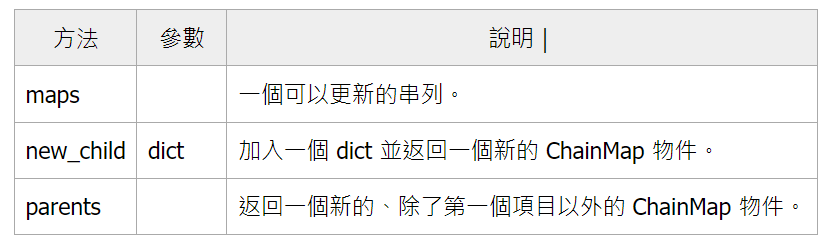

In [ ]:
from collections import ChainMap

a = {'x': 1, 'y': 2}
b = {'m': 3, 'n': 4}
c = {'i': 5, 'j': 6}
d = ChainMap(a, b, c)    # 根據 a、b、c 建立一個 ChainMap 物件
print(d['m'], d['j'])    # 3 6 讀取 ChainMap 物件中的 'm' 和 'j'
print(d.maps)            # [{'x': 1, 'y': 2}, {'m': 3, 'n': 4}, {'i': 5, 'j': 6}]
print(d.maps[0])         # {'x': 1, 'y': 2}

e = d.new_child()           # 加入一個空 dict 成為新的 ChainMap 物件
print(e)                    # ChainMap({}, {'x': 1, 'y': 2}, {'m': 3, 'n': 4}, {'i': 5, 'j': 6})
f = d.new_child({'z':100})  # 加入一個 'z':100} 成為新的 ChainMap 物件
print(f)                    # ChainMap({'z': 100}, {'x': 1, 'y': 2}, {'m': 3, 'n': 4}, {'i': 5, 'j': 6})
g = d.parents     # 去除第一個項目，成為新的 ChainMap 物件
h = g.parents     # 去除第一個項目，成為新的 ChainMap 物件
print(g)          # ChainMap({'m': 3, 'n': 4}, {'i': 5, 'j': 6})
print(h)          # ChainMap({'i': 5, 'j': 6})

##### Counter 
Counter 可以創建一個 dict 計數器物件，用來計算可迭代物件中每個物件的數量，Counter 有下列幾種方法：

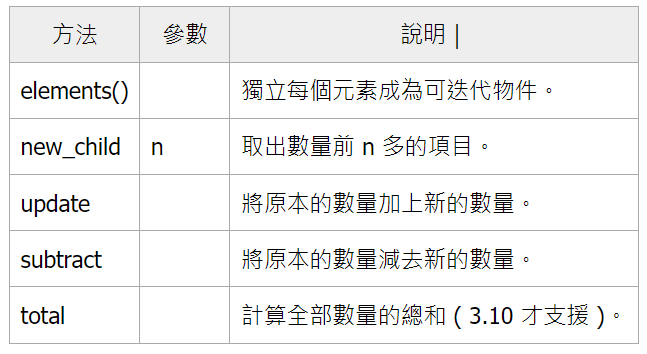

In [ ]:
from collections import Counter

t1 = 'hello world'
a = Counter(t1)     # 創建一個計數器物件
print(a)            # Counter({'l': 3, 'o': 2, 'h': 1, 'e': 1, ' ': 1, 'w': 1, 'r': 1, 'd': 1})

b = list(a.elements())   # 取出每個項目成為串列
print(b)                 # ['h', 'e', 'l', 'l', 'l', 'o', 'o', ' ', 'w', 'r', 'd']
print(sorted(b))         # 排序 [' ', 'd', 'e', 'h', 'l', 'l', 'l', 'o', 'o', 'r', 'w']

c = a.most_common(3)     # 取出前三多的項目
print(c)                 # [('l', 3), ('o', 2), ('h', 1)]

t2 = 'hello'
e = Counter(t2)          # 建立新的計數器物件
a.update(e)              # 加上新物件中的數量
print(a)                 # Counter({'l': 5, 'o': 3, 'h': 2, 'e': 2, ' ': 1, 'w': 1, 'r': 1, 'd': 1})
a.subtract(e)            # 減去新物件中的數量
print(a)                 # Counter({'l': 3, 'o': 2, 'h': 1, 'e': 1, ' ': 1, 'w': 1, 'r': 1, 'd': 1})

##### OrderedDict 
通常建立一個 dict 物件時無法決定 key 的順序，如果使用 OrderedDict 可以創建一個能記錄 key 順序 ( 先進先出 ) 的 dict 物件。

In [ ]:
from collections import OrderedDict

a = OrderedDict()
a['x'] = 2
a['y'] = 3
a['z'] = 1
print(a)   rderedDict([('x', 2), ('y', 3), ('z', 1)])

##### defaultdict 
通常在使用 dict 字典時，如果引用的 key 不存在會出現錯誤訊息，如果使用 defaultdict，就能創建一個可以使用可以預設值的 dict 物件。

In [ ]:
from collections import defaultdict

a = 'hello world'
b = defaultdict(lambda: 0)   # 創建一個空的使用預設值 0 的 dict 物件
for i in a:
    b[i] += 1    # 依序將 a 的字母設為 key，如果有 key 就將數值增加 1
print(b)       # faultdict(<function <lambda> at 0x10d7d5290>, {'h': 1, 'e': 1, 'l': 3, 'o': 2, ' ': 1, 'w': 1, 'r': 1, 'd': 1})

c = defaultdict(lambda: 'no')   # 如果 key 不存在，就回傳 no
for i in a:
    c[i] = i      # 依序將 a 的字母設為 key 和值
print(c['h'])   # h
print(c['a'])   # no